# Sequential Data Analysis in Python
1. **Ordered data**, consists of observations arranged in a specific order
2. Data is not necessarily time-based; it can represent sequences such as text, DNA strands, or user actions.

***Sequential data is a type of data where the order of observations matters***.
* Analyzing sequential data is vital for uncovering underlying patterns, dependencies, and structures in various fields.

* It helps in tasks such as ***natural language processing***, bioinformatics, and user behavior analysis, ***enabling better predictions, classifications***, and understanding of sequential patterns.






# Types of Sequential Data
### **Time Series Data**
* Consists of **observations recorded at specific time intervals**.
* Crucial for tracking changes over time and is widely used in fields such as finance, meteorology, and economics.

### **Text Data**
* Represents sequences of words, characters, or tokens.
* Fundamental to natural language processing (NLP) tasks such as text classification, sentiment analysis, and machine translation.



# Sequential Data Analysis : Stock Market Dataset

In [ ]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf #tool for easily downloading historical market data
from statsmodels.tsa.seasonal import seasonal_decompose #break down a time series into its fundamental components: Trend, Seasonality, and Residuals (noise).
from statsmodels.tsa.arima.model import ARIMA #a foundational algorithm for time series forecasting.
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

ARIMA, which stands for **Autoregressive Integrated Moving Average**, is a statistical model used for **analyzing and forecasting time series data**. It combines three components—autoregression (AR), differencing (I), and moving average (MA)—to model patterns like trends and seasonality. The model is defined by three parameters, \((p,d,q)\), representing the order of the autoregression, the degree of differencing, and the order of the moving average, respectively.

In [ ]:
#Load Data from Yahoo Finance
ticker = 'AAPL'
data = yf.download(ticker, start='2021-01-01', end='2024-07-01')

/tmp/ipython-input-2021517822.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2021-01-01', end='2024-07-01')
[*********************100%***********************]  1 of 1 completed


1. **Date (Index):** The daily timestamp for the data point.

2. **Open:** The stock price at the start of the trading day.

3. **High:** The highest price during the day.

4. **Low:** The lowest price during the day.

5. **Close:** The stock price at the end of the trading day.

6. **Adj Close:** The closing price adjusted for corporate actions (like dividends and splits), which is often the preferred value for time series analysis.

7. **Volume:** The total number of shares traded during the day.

In [ ]:
# Use the 'Close' column for analysis
df = data[['Close']]

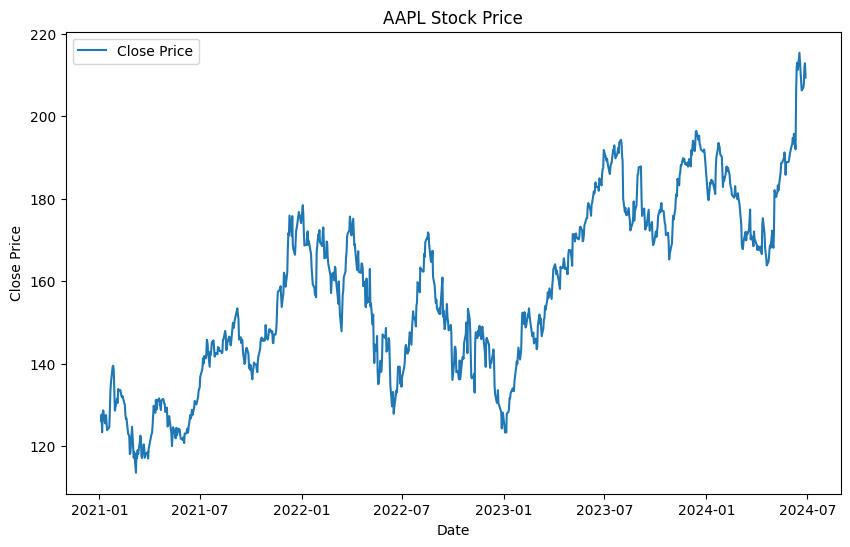

In [ ]:
# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(df['Close'], label='Close Price')
plt.title(f'{ticker} Stock Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

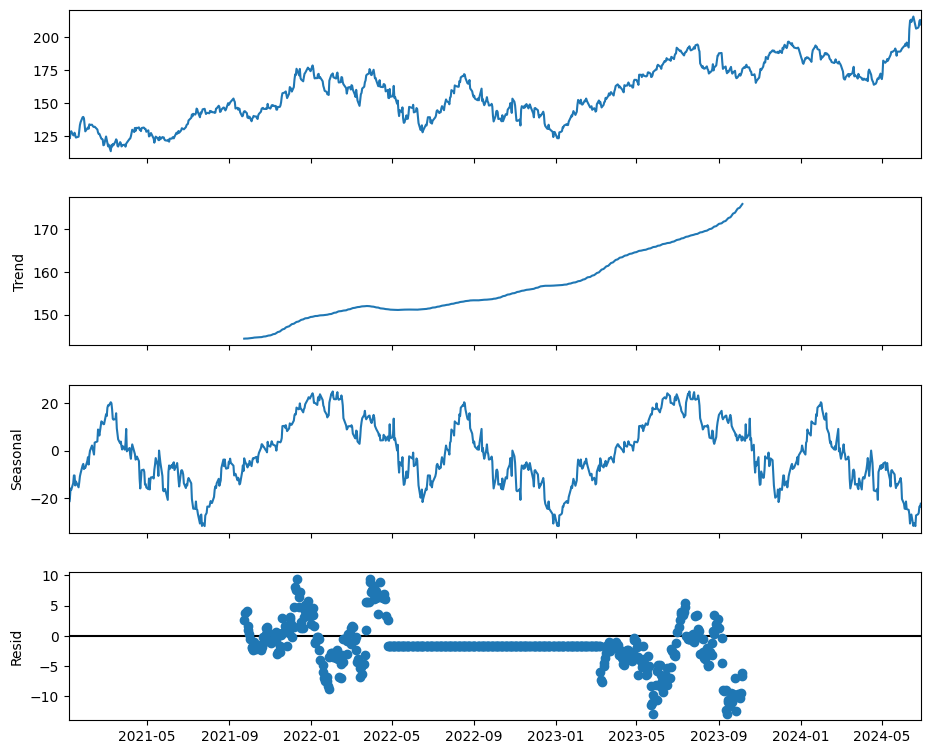

In [ ]:
# Decompose the time series
#Decompose the time series into trend, seasonal, and residual components.
decomposition = seasonal_decompose(df['Close'], model='additive', period=365)
fig = decomposition.plot()
fig.set_size_inches(10, 8)
plt.show()

A residual is the difference between the observed value and the value estimated by a model or trend. It represents the unexplained variation or the error of your model's prediction.In mathematical terms:$$\text{Residual} = \text{Observed Value} - \text{Predicted Value}$$

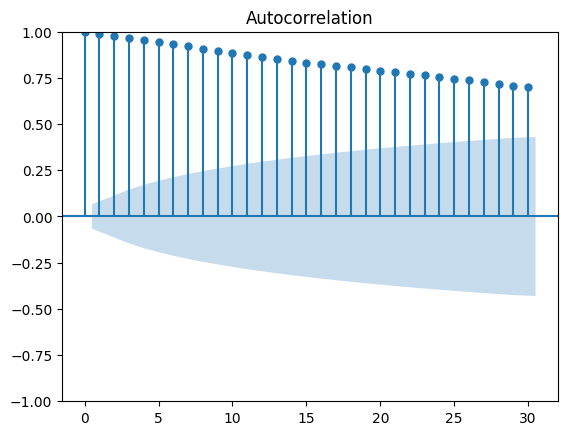

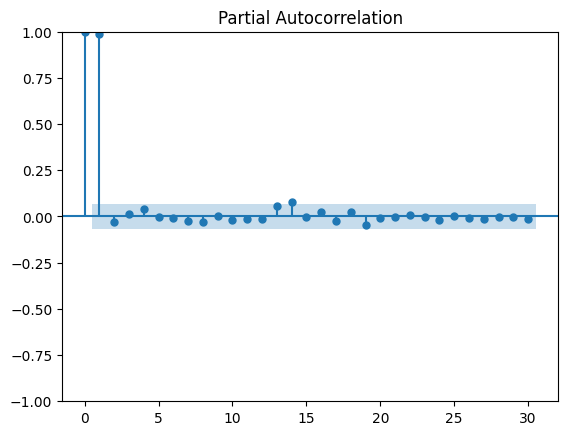

In [ ]:
# Autocorrelation and Partial Autocorrelation Plots
#Generate ACF and PACF plots to understand the correlation structure of the time series.
plot_acf(df['Close'].dropna())
plt.show()

plot_pacf(df['Close'].dropna())
plt.show()

In [ ]:
# ARIMA Model
# Define the model
model = ARIMA(df['Close'].dropna(), order=(5, 1, 1))
# Fit the model
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   AAPL   No. Observations:                  877
Model:                 ARIMA(5, 1, 1)   Log Likelihood               -2094.939
Date:                Wed, 29 Oct 2025   AIC                           4203.879
Time:                        05:44:22   BIC                           4237.306
Sample:                             0   HQIC                          4216.665
                                - 877                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0081      6.607      0.001      0.999     -12.942      12.958
ar.L2         -0.0462      0.115     -0.402      0.688      -0.271       0.179
ar.L3         -0.0151      0.308     -0.049      0.9

In [ ]:
# Forecasting
# Forecast for the next 30 days
forecast_steps = 30
forecast = model_fit.forecast(steps=forecast_steps)

# Create a DataFrame for the forecast
forecast_dates = pd.date_range(start=df.index[-1], periods=forecast_steps + 1, freq='B')[1:]  # 'B' for business days



# Correcting the combination of forecast values and dates
forecast_combined = pd.DataFrame({
    'Date': forecast_dates,
    'Forecast': forecast
})

print(forecast_combined)

          Date    Forecast
877 2024-07-01  209.246625
878 2024-07-02  209.416706
879 2024-07-03  209.463625
880 2024-07-04  209.430585
881 2024-07-05  209.440846
882 2024-07-08  209.443656
883 2024-07-09  209.443224
884 2024-07-10  209.442487
885 2024-07-11  209.442685
886 2024-07-12  209.442698
887 2024-07-15  209.442684
888 2024-07-16  209.442677
889 2024-07-17  209.442683
890 2024-07-18  209.442682
891 2024-07-19  209.442682
892 2024-07-22  209.442682
893 2024-07-23  209.442682
894 2024-07-24  209.442682
895 2024-07-25  209.442682
896 2024-07-26  209.442682
897 2024-07-29  209.442682
898 2024-07-30  209.442682
899 2024-07-31  209.442682
900 2024-08-01  209.442682
901 2024-08-02  209.442682
902 2024-08-05  209.442682
903 2024-08-06  209.442682
904 2024-08-07  209.442682
905 2024-08-08  209.442682
906 2024-08-09  209.442682


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(df['Close'], label='Historical')
plt.plot(forecast_combined['Date'], forecast_combined['Forecast'], label='Forecast', color='red')
plt.title(f'{ticker} Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Sequential Data Analysis using Sample Text

In [ ]:
import nltk #Natural Language Toolkit
from nltk.tokenize import word_tokenize, sent_tokenize #break down a block of text into individual words or into individual sentences

#predefined list of common, high-frequency words (e.g., "the," "a," "is") that are often removed to focus on the more meaningful words.
from nltk.corpus import stopwords

from nltk.probability import FreqDist#help count the frequency of items (like words) in a list and analyze their distribution.
from textblob import TextBlob #sentiment analysis
import matplotlib.pyplot as plt

In [ ]:
#Downloading Necessary NLTK Data
nltk.download('punkt_tab') #Tokenization model
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger_eng') #POS tagger model used to assign grammatical labels (noun, verb, adjective, etc.) to words.

#Classifier used for Named Entity Recognition (NER), which identifies entities like people, organizations, or locations.
nltk.download('maxent_ne_chunker_tab')

#A simple list of common English words, often used for filtering or context.
nltk.download('words')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker_tab.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [ ]:
#Define a sample text that will be used for all the analysis in this script.
text = """
Natural Language Processing (NLP) is a field of artificial intelligence
that focuses on the interaction between computers and humans through
natural language. The ultimate objective of NLP is to read, decipher,
understand, and make sense of human languages in a valuable way.
Most NLP techniques rely on machine learning to derive meaning from
human languages.
"""

In [ ]:
#Tokenize the sample text into words and sentences.
word_tokens = word_tokenize(text)
sentence_tokens = sent_tokenize(text)

In [ ]:
word_tokens

['Natural',
 'Language',
 'Processing',
 '(',
 'NLP',
 ')',
 'is',
 'a',
 'field',
 'of',
 'artificial',
 'intelligence',
 'that',
 'focuses',
 'on',
 'the',
 'interaction',
 'between',
 'computers',
 'and',
 'humans',
 'through',
 'natural',
 'language',
 '.',
 'The',
 'ultimate',
 'objective',
 'of',
 'NLP',
 'is',
 'to',
 'read',
 ',',
 'decipher',
 ',',
 'understand',
 ',',
 'and',
 'make',
 'sense',
 'of',
 'human',
 'languages',
 'in',
 'a',
 'valuable',
 'way',
 '.',
 'Most',
 'NLP',
 'techniques',
 'rely',
 'on',
 'machine',
 'learning',
 'to',
 'derive',
 'meaning',
 'from',
 'human',
 'languages',
 '.']

In [ ]:
sentence_tokens

['\nNatural Language Processing (NLP) is a field of artificial intelligence \nthat focuses on the interaction between computers and humans through \nnatural language.',
 'The ultimate objective of NLP is to read, decipher, \nunderstand, and make sense of human languages in a valuable way.',
 'Most NLP techniques rely on machine learning to derive meaning from \nhuman languages.']

In [ ]:
#Remove Stopwords
#Filter out common stopwords from the word tokens to focus on meaningful words.
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in word_tokens if word.lower() not in stop_words and word.isalnum()]

In [ ]:
filtered_words

['Natural',
 'Language',
 'Processing',
 'NLP',
 'field',
 'artificial',
 'intelligence',
 'focuses',
 'interaction',
 'computers',
 'humans',
 'natural',
 'language',
 'ultimate',
 'objective',
 'NLP',
 'read',
 'decipher',
 'understand',
 'make',
 'sense',
 'human',
 'languages',
 'valuable',
 'way',
 'NLP',
 'techniques',
 'rely',
 'machine',
 'learning',
 'derive',
 'meaning',
 'human',
 'languages']

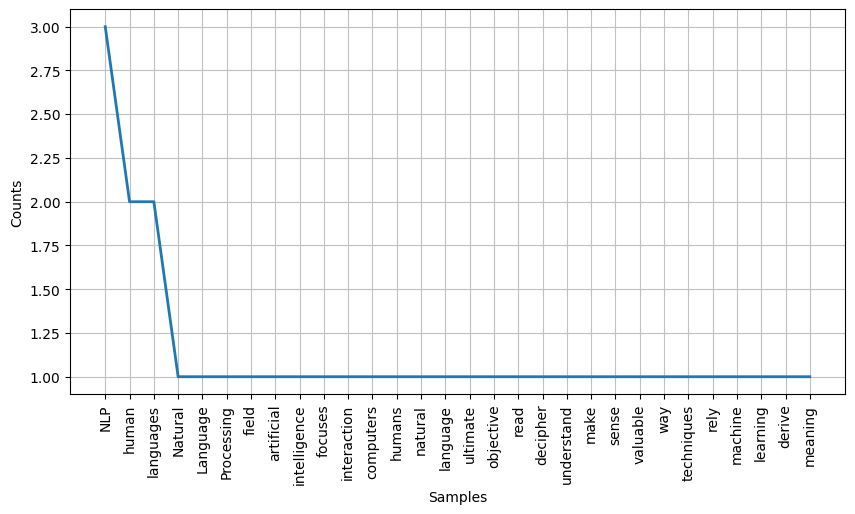

In [ ]:
#Word Frequency Distribution
#Calculate and plot the frequency distribution of the filtered words
fdist = FreqDist(filtered_words)

plt.figure(figsize=(10, 5))
fdist.plot(30, cumulative=False)
plt.show()

In [ ]:
#Sentiment Analysis
blob = TextBlob(text)
sentiment = blob.sentiment

# 📊 Sentiment Output
The sentiment variable will store a named tuple containing two key floating-point numbers: Polarity and Subjectivity.

### 1. Polarity
**Definition**: Measures the emotional tone of the text, ranging from -1.0 (highly negative) to +1.0 (highly positive).

**Interpretation:** A value near 0 indicates a neutral sentiment.

### 2. Subjectivity
**Definition:** Measures how much of the text is opinion vs. fact, ranging from 0.0 (very objective/factual) to 1.0 (very subjective/personal opinion).

**Interpretation:** A value near 0 means the text is likely reporting facts, while a value near 1 means it contains personal beliefs, feelings, or judgments.

In [ ]:
sentiment

Sentiment(polarity=0.012499999999999997, subjectivity=0.45)

In [ ]:
#Named Entity Recognition
def named_entity_recognition(text):
    words = nltk.word_tokenize(text)
    tagged = nltk.pos_tag(words) #Part-of-Speech (POS) Tagging
    entities = nltk.chunk.ne_chunk(tagged)
    return entities

entities = named_entity_recognition(text)

In [ ]:
print("Word Tokens:", word_tokens)
print("Sentence Tokens:", sentence_tokens)
print("Filtered Words:", filtered_words)
print("Word Frequency Distribution:", fdist)
print("Sentiment Analysis:", sentiment)
print("Named Entities:")
entities.pprint()

Word Tokens: ['Natural', 'Language', 'Processing', '(', 'NLP', ')', 'is', 'a', 'field', 'of', 'artificial', 'intelligence', 'that', 'focuses', 'on', 'the', 'interaction', 'between', 'computers', 'and', 'humans', 'through', 'natural', 'language', '.', 'The', 'ultimate', 'objective', 'of', 'NLP', 'is', 'to', 'read', ',', 'decipher', ',', 'understand', ',', 'and', 'make', 'sense', 'of', 'human', 'languages', 'in', 'a', 'valuable', 'way', '.', 'Most', 'NLP', 'techniques', 'rely', 'on', 'machine', 'learning', 'to', 'derive', 'meaning', 'from', 'human', 'languages', '.']
Sentence Tokens: ['\nNatural Language Processing (NLP) is a field of artificial intelligence \nthat focuses on the interaction between computers and humans through \nnatural language.', 'The ultimate objective of NLP is to read, decipher, \nunderstand, and make sense of human languages in a valuable way.', 'Most NLP techniques rely on machine learning to derive meaning from \nhuman languages.']
Filtered Words: ['Natural', 'L

# Sequence Models is very popular for speech recognition, voice recognition, time series prediction, and natural language processing.

# Image Captioning:
 Caption an image by analyzing the present action.
 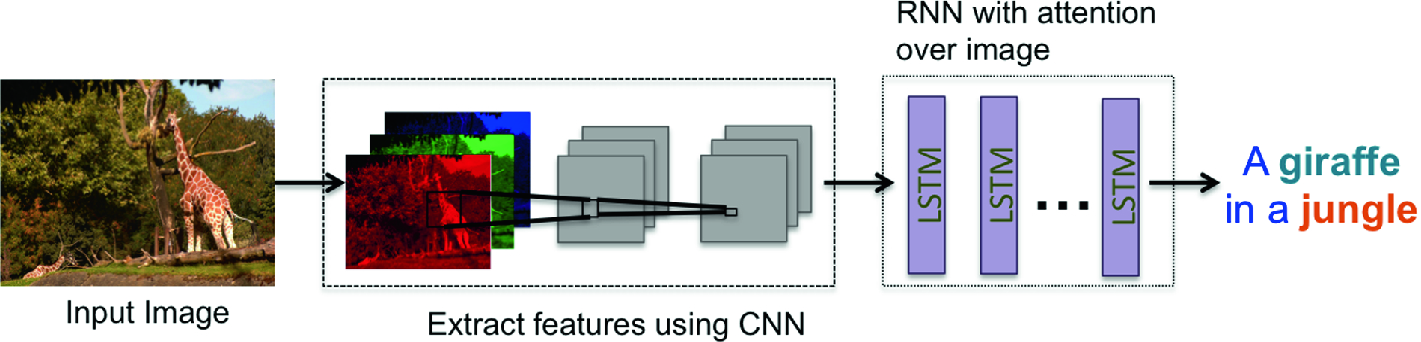

#####################

# Recurrent Neural Networks (RNNs)
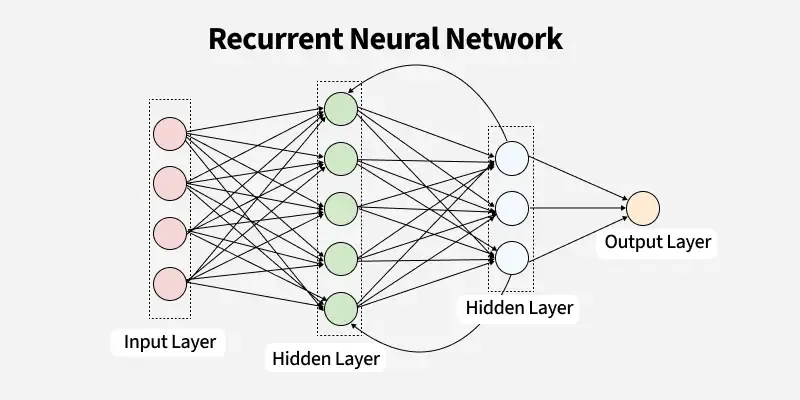

**“remembering” past information and passing the output from one step as input to the next **i.e it considers all the earlier words to choose the most likely next word. This** memory of previous steps helps the network understand context and make better predictions.**

# Key Components of RNNs
## 1. Recurrent Neurons
* They hold a hidden state that maintains information about previous inputs in a sequence.
###💡 The Hidden State: Your Network's Short-Term Memory
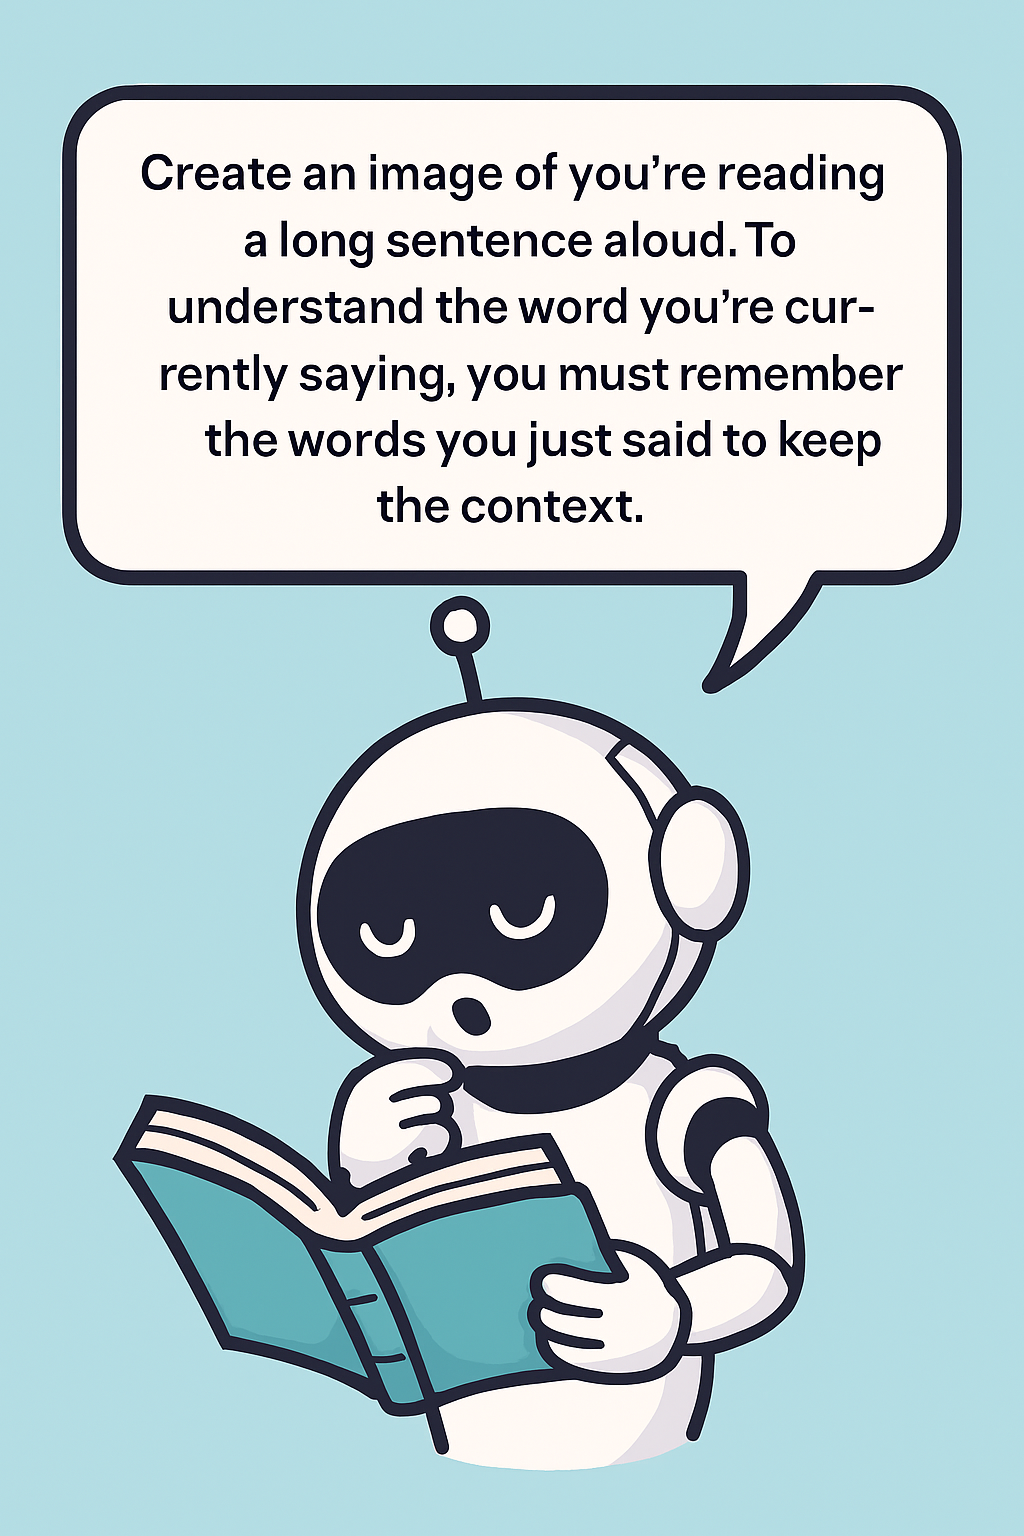
* "remember" information from prior steps by feeding back their hidden state, allowing them to **capture dependencies across time**.

### a. Processing Data Sequentially (Time Steps)
An RNN processes a sequence (like a sentence: "The dog ran") one item (word) at a time. Each item is called a **time step** ($t$)
* Time Step 1: Input is "The"
* Time Step 2: Input is "dog"
* Time Step 3: Input is "ran".

### b. The Recurrent Connection (The Loop)
The result from **one time step is fed back into the network as an extra input for the next time step**.
* This output that gets fed back is the Hidden State ($h_t$).

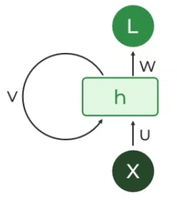

##2. RNN Unfolding
* **process of expanding the recurrent structure over time steps**.
* **each step** of the sequence is represented as a **separate layer in a series illustrating how information flows across each time step.**
* unrolling enables **backpropagation through time (BPTT)** a learning process where errors are propagated across time steps to **adjust the network’s weights enhancing the RNN’s ability to learn dependencies within sequential data**.
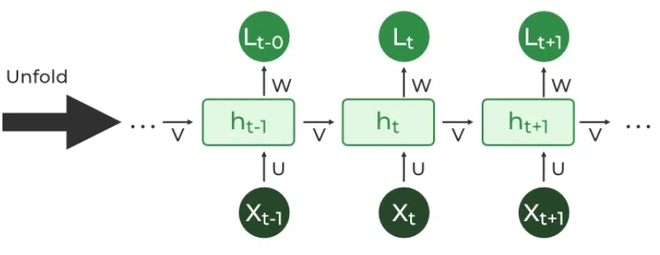

# RNN vs Other DL
1. Share similarities in input and output structures
2. Differ significantly in how information flows from input to output.
3. Traditional deep neural networks where **each dense layer has distinct weight matrices**.
4. RNNs use **shared weights across time steps, allowing them to remember information over sequences**.

Hidden state
H<sub>i</sub>  is calculated for every input X<sub>i</sub> to retain sequential dependencies.
1. Hidden State Calculation:
####**h=σ(U⋅X+W⋅h<sub>t−1</sub>​+B)**
Here:
* h represents the current hidden state.
* U and W are weight matrices.
* B is the bias.
### 📊 Recurrent Neural Network Hidden State Components

---

| Component | Description | Role |
| :--- | :--- | :--- |
| **$h_t$** | **Current Hidden State** | The new memory/state of the network at the current time step $t$. |
| **$\sigma$** | **Activation Function** | A non-linear function (like $\tanh$ or $\text{ReLU}$) that squashes the result into a specific range, introducing **non-linearity**. |
| **$X_t$** | **Current Input** | The input vector for the current time step $t$ (e.g., a word vector). |
| **$h_{t-1}$** | **Previous Hidden State** | The hidden state (memory) from the previous time step $t-1$. This is the **recurrent** component. |
| **$U$** | **Input Weight Matrix** | The weight matrix that transforms the **current input** ($X_t$). This is a **learnable parameter**. |
| **$W$** | **Recurrent Weight Matrix** | The weight matrix that transforms the **previous hidden state** ($h_{t-1}$). This is a **learnable parameter** and is **shared** across all time steps. |
| **$B$** | **Bias Vector** | A learnable bias vector added to the weighted sum, which shifts the output of the activation function. |

---

## 2. Output Calculation:
#### **Y=O(V⋅h+C)**
### 📤 RNN Output Layer Equation Components: $Y = O(V \cdot h + C)$

---

| Component | Description | Role |
| :--- | :--- | :--- |
| **$Y$ (or $Y_t$)** | **Output Vector** | The final result or prediction of the network at time step $t$. |
| **$O$** | **Output Activation Function** | A non-linear function that determines the final output format. Typically **Softmax** for classification, or Identity for regression. |
| **$V$** | **Output Weight Matrix** | The weight matrix that maps the hidden state ($h$) to the output space. This is a **learnable parameter**. |
| **$h$ (or $h_t$)** | **Current Hidden State** | The network's "memory" or internal state at time step $t$. |
| **$C$** | **Output Bias Vector** | A learnable bias vector added before the final activation. |

---

# Overall Function:
### **_Y_\=_f_(_X_,_h_,_W_,_U_,_V_,_B_,_C_)**
### **The Full Functional Dependence of a Vanilla RNN Output**

The equation $Y=f(X,h,W,U,V,B,C)$ is an **abstract functional form** stating that the final **Output ($Y$)** of a Recurrent Neural Network (RNN) at time $t$ is dependent on all of its inputs, hidden states, and learned parameters.

It summarizes the network's entire operation, which is broken down into two main recursive calculations: the **Hidden State Update** and the **Output Calculation**.

---

### 1. The Two Main Equations of a Vanilla RNN

The abstract function $f(\dots)$ is executed in two steps at every time step $t$.

#### **Step 1: Hidden State Update (The "Memory" Step)**

This equation calculates the **new memory** ($h_t$) based on the current input and the previous memory.

$$h_t = \sigma(U \cdot X_t + W \cdot h_{t-1} + B)$$

* **$h_t$**: Current Hidden State (new memory).
* **$h_{t-1}$**: Previous Hidden State (old memory/recurrent component).
* **$X_t$**: Current Input.
* **$U, W, B$**: Learnable parameters (weights and bias).
* **$\sigma$**: Activation function (e.g., $\tanh$), introducing non-linearity.

#### **Step 2: Output Calculation (The "Prediction" Step)**

This equation takes the current memory ($h_t$) and transforms it into the final output or prediction ($Y_t$).

$$Y_t = O(V \cdot h_t + C)$$

* **$Y_t$**: Final Output/Prediction.
* **$h_t$**: Current Hidden State.
* **$V, C$**: Learnable parameters (output weights and bias).
* **$O$**: Output activation function (e.g., $\text{Softmax}$ for probabilities).

---

### 2. 📊 Component Summary

This table lists all the components included in the abstract equation $Y=f(X,h,W,U,V,B,C)$.

| Component | Category | Full Description |
| :--- | :--- | :--- |
| **$Y$** | Output | The final prediction or result vector at time $t$. |
| **$X$** | Input | The input vector fed into the network at time $t$. |
| **$h$** | State/Memory | The Hidden State vector, which stores context from the sequence. |
| **$W$** | Learned Parameter | Recurrent Weight Matrix (hidden-to-hidden connections). |
| **$U$** | Learned Parameter | Input Weight Matrix (input-to-hidden connections). |
| **$V$** | Learned Parameter | Output Weight Matrix (hidden-to-output connections). |
| **$B$** | Learned Parameter | Bias Vector for the Hidden State update. |
| **$C$** | Learned Parameter | Bias Vector for the Output calculation. |

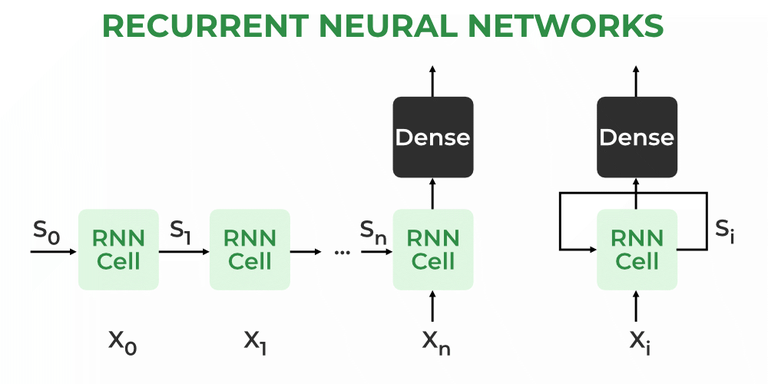

# 🔍 Role of the Dense Layer in an RNN

The Dense layer takes the internal memory, or hidden state ($S_n$ or $S_i$), and converts it into a final output prediction ($Y$).

* **Function:** It implements the final part of the RNN's forward pass, which is typically described by the equation:

$$Y_t = O(V \cdot S_t + C)$$

* **$S_t$ (Hidden State):** This is the output of the RNN Cell (the green block), representing the network's processed understanding of the sequence up to that time step.
* **Dense Layer Operation:** The Dense layer applies the Output Weight Matrix ($V$) and adds the Output Bias Vector ($C$).
* **Output Activation ($O$):** The output of the Dense layer is usually passed through a final activation function $O$, such as:
   * **Softmax:** for multi-class classification (e.g., predicting the next word).
   * **Sigmoid:** for binary classification (e.g., sentiment analysis).
   * **Identity (linear):** for regression tasks.

#####################

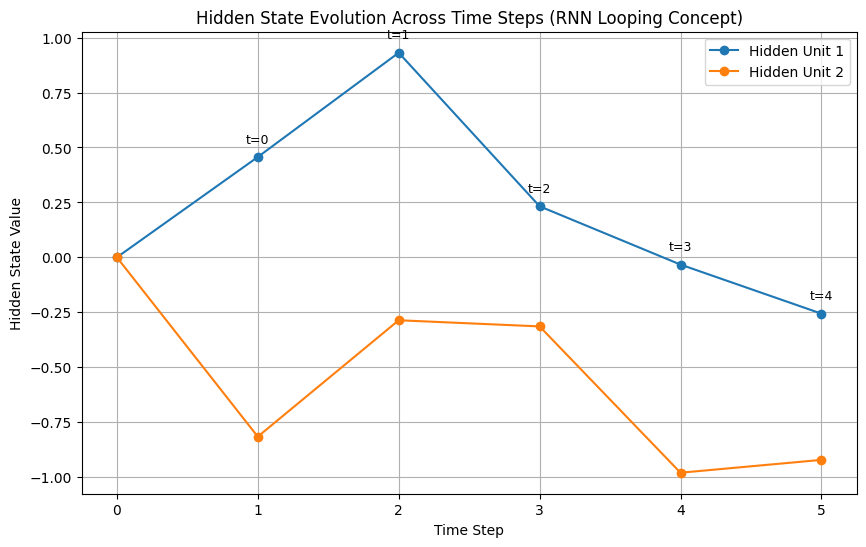

In [ ]:
#RNN Hidden State Visualization
import numpy as np
import matplotlib.pyplot as plt

# Fix random seed for reproducibility
np.random.seed(0)

# Define input sequence (e.g., 5 time steps, 3 features each)
x = np.random.randn(5, 3)
'''[[ 0.534, -0.211,  1.109],  # Row 1
 [-0.852,  0.035,  0.720],  # Row 2
 [ 1.543, -0.661, -0.187],  # Row 3
 [-0.490,  0.899,  1.751],  # Row 4
 [ 0.281,  0.645, -0.372]] # Row 5'''

# RNN parameters (for simplicity)
input_size = 3 #dimensionality of the input vector Xt
#determines the size of the Input Weight Matrix (U or W), which maps the input to the hidden space.
hidden_size = 2 #dimensionality of the hidden state vector

# initializes the Input Weight Matrix  which connects the current input vector Xt to the hidden state.
W_xh = np.random.randn(hidden_size, input_size) * 0.5  # input to hidden

#initializes the Recurrent Weight Matrix which connects the previous hidden state (ht-1)o the current hidden state.
W_hh = np.random.randn(hidden_size, hidden_size) * 0.5  # hidden to hidden

#initializes the bias vector for the hidden state update in the Recurrent Neural Network (RNN)
b_h = np.zeros((hidden_size, 1))

# Activation function (tanh)
def tanh(x):
    return np.tanh(x)

# Initial hidden state
h_prev = np.zeros((hidden_size, 1))

# Store hidden states for visualization
hidden_states = [h_prev]

# Process sequence :- network processes the sequence element by element and updates its internal memory, or hidden state.
for t in range(len(x)):
    x_t = x[t].reshape(-1, 1) #Prepares the input
    #Calculates the network's new memory.
    h_t = tanh(np.dot(W_xh, x_t) + np.dot(W_hh, h_prev) + b_h)
    hidden_states.append(h_t)
    h_prev = h_t

# Convert to array for plotting
hidden_states = np.hstack(hidden_states)

# --- Visualization ---
plt.figure(figsize=(10, 6))
plt.plot(hidden_states[0, :], marker='o', label='Hidden Unit 1')
plt.plot(hidden_states[1, :], marker='o', label='Hidden Unit 2')

for t in range(len(x)):
    plt.annotate(f"t={t}", (t+1, hidden_states[0, t+1]),
                 textcoords="offset points", xytext=(0,10), ha='center', fontsize=9)

plt.title("Hidden State Evolution Across Time Steps (RNN Looping Concept)")
plt.xlabel("Time Step")
plt.ylabel("Hidden State Value")
plt.grid(True)
plt.legend()
plt.show()


### 🧠 Interpretation of the Evolution

The evolution of these two lines demonstrates the **memory and context-building function** of the RNN:

---

#### **1. Initial State ($t=0$)**

* Both hidden units start at **0.0**, reflecting the initialization of $\mathbf{h_{-1}}$ to a zero vector (`np.zeros((hidden_size, 1))`).
* The first point, labeled $t=0$, is actually the result of processing the **first input $\mathbf{X_0}$**.
* The first hidden state is approximately:
    $$\mathbf{h_0} \approx \begin{pmatrix} 0.45 \\ 0.0 \end{pmatrix}$$

---

#### **2. Peak Response ($t=1$ to $t=2$)**

* **Hidden Unit 1 (blue)** increases sharply from $t=0$ to a **peak value of nearly 1.0** at $t=1$. This suggests that the input at $t=1$ ($\mathbf{X_1}$) had a **strong positive influence** on the first hidden dimension, causing the network to assign a high positive value to that feature.
* **Hidden Unit 2 (orange)** drops to a strong negative value (around $-0.8$) at $t=1$, indicating the input had a **strong negative effect** on the second feature.

---

#### **3. Information Modulation/Decay ($t=2$ and $t=3$)**

* After the input at $t=2$ ($\mathbf{X_2}$), Hidden Unit 1's value begins to **fall off sharply**, and Hidden Unit 2's value **stabilizes slightly**.
* This signifies that the network is **modulating** or perhaps starting to **forget** the strong information captured at $t=1$ as new, perhaps less impactful, data comes in.

---

#### **4. New Information Capture ($t=4$)**

* At $t=4$, Hidden Unit 2 **plummets to a value of nearly $-1.0$**.
* This indicates that the input $\mathbf{X_4}$ caused a **drastic, strong negative update** to the second dimension of the hidden state.

---

**In summary,** the graph visually represents the $\mathbf{h_t}$ calculation at each time step, showing that the hidden state is **dynamic** and that its values are being continually updated by the current input $\mathbf{X_t}$ and the accumulated memory $\mathbf{h_{t-1}}$.

########################

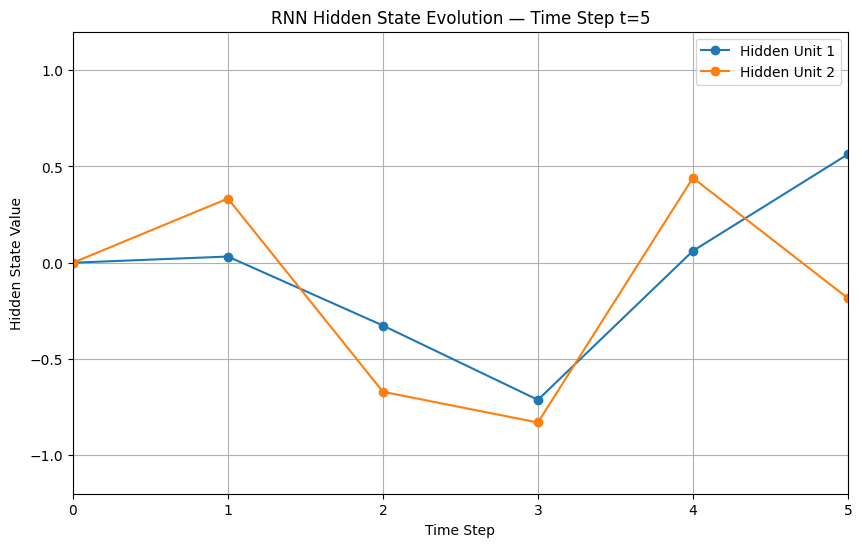

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Fix random seed for reproducibility
np.random.seed(42)

# Define input sequence (5 time steps, 3 features)
x = np.random.randn(5, 3)

# RNN parameters
input_size = 3
hidden_size = 2

W_xh = np.random.randn(hidden_size, input_size) * 0.5
W_hh = np.random.randn(hidden_size, hidden_size) * 0.5
b_h = np.zeros((hidden_size, 1))

# Activation function
def tanh(x):
    return np.tanh(x)

# Compute hidden states
h_prev = np.zeros((hidden_size, 1))
hidden_states = [h_prev]
for t in range(len(x)):
    x_t = x[t].reshape(-1, 1)
    h_t = tanh(np.dot(W_xh, x_t) + np.dot(W_hh, h_prev) + b_h)
    hidden_states.append(h_t)
    h_prev = h_t

hidden_states = np.hstack(hidden_states)  # shape (2, 6)

# --- Visualization setup ---
fig, ax = plt.subplots(figsize=(10, 6))
(line1,) = ax.plot([], [], 'o-', color='tab:blue', label='Hidden Unit 1')
(line2,) = ax.plot([], [], 'o-', color='tab:orange', label='Hidden Unit 2')

ax.set_xlim(0, len(hidden_states[0]) - 1)
ax.set_ylim(-1.2, 1.2)
ax.set_xlabel("Time Step")
ax.set_ylabel("Hidden State Value")
ax.set_title("Animated RNN Hidden State Evolution (Looping Through Time)")
ax.grid(True)
ax.legend()

# --- Initialization ---
def init():
    line1.set_data([], [])
    line2.set_data([], [])
    return line1, line2

# --- Update animation ---
def update(frame):
    t_vals = np.arange(frame + 1)
    line1.set_data(t_vals, hidden_states[0, :frame + 1])
    line2.set_data(t_vals, hidden_states[1, :frame + 1])
    ax.set_title(f"RNN Hidden State Evolution — Time Step t={frame}")
    return line1, line2

# --- Create animation ---
ani = FuncAnimation(
    fig,
    update,
    frames=len(hidden_states[0]),
    init_func=init,
    blit=True,
    interval=1000,
    repeat=False,
)

# --- Show animation properly in Google Colab ---
HTML(ani.to_jshtml())


############################

# Types Of Recurrent Neural Networks
## 1. One-to-One RNN
* It is used for straightforward classification tasks such as binary classification where no sequential data is involved.
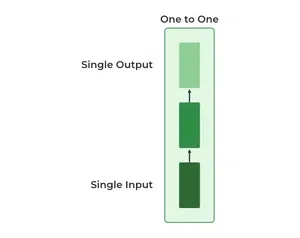

## 2. One-to-Many RNN
* Useful in tasks where one input triggers a sequence of predictions (outputs).
* In image captioning a single image can be used as input to generate a sequence of words as a caption.
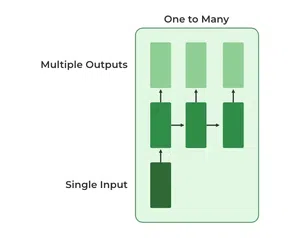

Saving Copilot_20251029_203709.png to Copilot_20251029_203709 (1).png


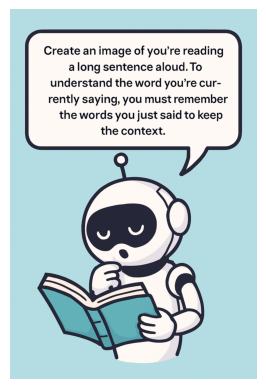

The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.
You may ignore this warning if your `pad_token_id` (50256) is identical to the `bos_token_id` (50256), `eos_token_id` (50256), or the `sep_token_id` (None), and your input is not padded.



🖼️ Generated Caption:
→ a painting of a bear on a wall 


In [ ]:
!pip install transformers pillow torch torchvision --quiet

from transformers import VisionEncoderDecoderModel, ViTImageProcessor, AutoTokenizer
import torch
from PIL import Image
import matplotlib.pyplot as plt
import requests
import io
import base64
from google.colab import files

# --- Load pretrained model ---
model_id = "nlpconnect/vit-gpt2-image-captioning"

model = VisionEncoderDecoderModel.from_pretrained(model_id)
feature_extractor = ViTImageProcessor.from_pretrained(model_id)
tokenizer = AutoTokenizer.from_pretrained(model_id)

device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

# ========== OPTION 1: Use an online image ==========
# image_url = "https://huggingface.co/datasets/nlpconnect/vit-gpt2-image-captioning/resolve/main/sample.jpg"
# image = Image.open(requests.get(image_url, stream=True).raw)

# ========== OPTION 2: Upload your own image ==========
uploaded = files.upload()
image = Image.open(list(uploaded.keys())[0])

# ========== OPTION 3: Use base64 string (your case) ==========
#base64_str = """<PASTE YOUR BASE64 STRING HERE>"""  # without data:image/jpeg;base64, prefix
#image_bytes = base64.b64decode(base64_str)
#image = Image.open(io.BytesIO(image_bytes))

# --- Display image ---
plt.imshow(image)
plt.axis("off")
plt.show()

# --- Generate caption ---
pixel_values = feature_extractor(images=image, return_tensors="pt").pixel_values.to(device)
generated_ids = model.generate(pixel_values, max_length=20, num_beams=4)
generated_caption = tokenizer.decode(generated_ids[0], skip_special_tokens=True)

print("\n🖼️ Generated Caption:")
print("→", generated_caption)
